## Summarize decision data and prepare for R analysis

This is primarily here to generate a tidy version of the data in order to anlayze in R using lmer.


In [2]:
import os
import sys
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt
sys.path.append('../')
from utils import get_metadata,get_decisions,get_merged_metadata_decisions

basedir = '/Users/poldrack/data_unsynced/NARPS_docker'
figdir = os.path.join(basedir,'figures')

%matplotlib inline

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# load metadata - tidy version including smoothness, generated by PrepareMaps.ipynb

alldata_df = pandas.read_csv(os.path.join(basedir,'metadata/all_metadata.csv'))

#### Table of mean results from each hypothesis

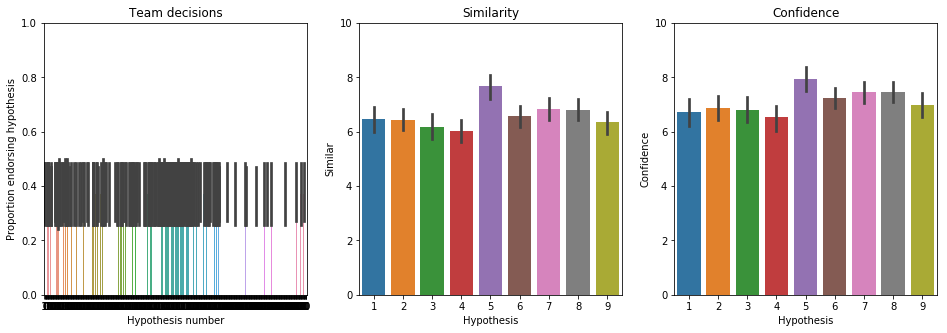

In [5]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

seaborn.barplot('varnum','Decision',data=alldata_df,ax=ax[0], order=alldata_df['Decision'])
ax[0].set_ylim([0,1])
ax[0].set_ylabel('Proportion endorsing hypothesis')
ax[0].set_xlabel('Hypothesis number')
ax[0].set_title('Team decisions')

seaborn.barplot('varnum','Similar',data=alldata_df,ax=ax[1])
ax[1].set_ylim([0,10])
ax[1].set_xlabel('Hypothesis')
ax[1].set_title('Similarity')

seaborn.barplot('varnum','Confidence',data=alldata_df,ax=ax[2])
ax[2].set_ylim([0,10])
ax[2].set_xlabel('Hypothesis')
ax[2].set_title('Confidence')

plt.savefig(os.path.join(figdir,'decision_summary.pdf'))

### Plot decisions splitting by use of fmriprep

Text(0.5, 0, 'Hypothesis')

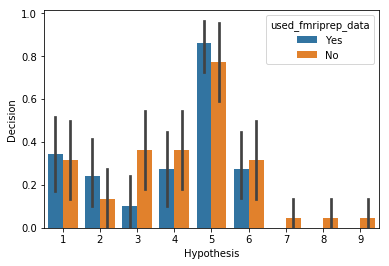

In [14]:
seaborn.barplot('varnum','Decision',data=alldata_df,hue='used_fmriprep_data')
plt.xlabel('Hypothesis')

### Plot smoothing as function of decision



Text(0, 0.5, 'applied smoothing kernel (FWHM mm)')

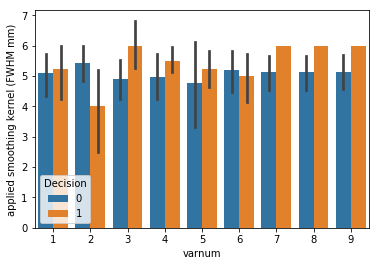

In [15]:
# applied smoothing kernel

seaborn.barplot('varnum','TSc_smoothing',data=alldata_df,hue='Decision')
plt.ylabel('applied smoothing kernel (FWHM mm)')

Text(0, 0.5, 'estimated smooothness (FWHM mm)')

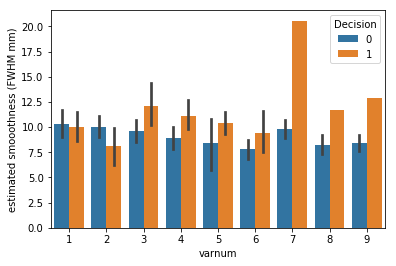

In [16]:

seaborn.barplot('varnum','fwhm',data=alldata_df,hue='Decision')
plt.ylabel('estimated smooothness (FWHM mm)')

SpearmanrResult(correlation=0.7803085631525173, pvalue=5.209820472236994e-86)


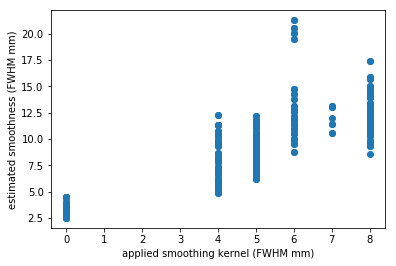

In [17]:
# confirm that applied smoothing relates to estimated smoothness
import scipy.stats

plt.scatter(alldata_df.TSc_smoothing,alldata_df.fwhm)
plt.xlabel('applied smoothing kernel (FWHM mm)')
_=plt.ylabel('estimated smoothness (FWHM mm)')
print(scipy.stats.spearmanr(alldata_df.TSc_smoothing,alldata_df.fwhm,nan_policy='omit'))

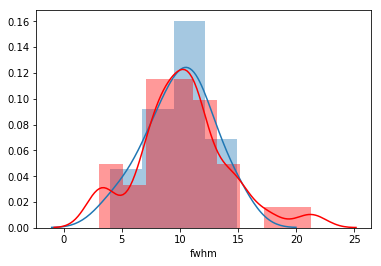

In [18]:
# distribution of FWHM as a function of decision for hypothesis 1

seaborn.distplot(alldata_df.query('Decision==1 & varnum==1').fwhm.dropna())
seaborn.distplot(alldata_df.query('Decision==0 & varnum==1').fwhm.dropna(),color='r')
